# Line Graphs

Line graphs are often used to show the change in a single variable over time. In this lesson we're going to learn how to make and customize line graphs using a **package** called `seaborn`, which we will give the nickname `sns`.

In [1]:
# import seaborn and nickname it sns
import seaborn as sns
# import numpy and nickname it np
import numpy as np
# set up inline figures
%matplotlib inline

`seaborn` is mainly a package for plotting, but we can also load some built-in datasets using the `load_dataset` function.

In [2]:
# load fmri dataset
fmri = sns.load_dataset("fmri")
# preview fmri dataset
fmri.head()
fmri.tail()

,subject,timepoint,event,region,signal
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367
1063,s0,0,cue,parietal,-0.006899


In [3]:
# get unique subjects
np.unique(fmri['subject'])

array(['s0', 's1', 's10', 's11', 's12', 's13', 's2', 's3', 's4', 's5',
       's6', 's7', 's8', 's9'], dtype=object)

This data contains [fMRI signals](https://en.wikipedia.org/wiki/Functional_magnetic_resonance_imaging) in the frontal and parietal regions of the brain over time for 14 subjects (s0 - s13). To illustrate how this signal changes over the timeframe of the fMRI scan, let's make our first line graph.

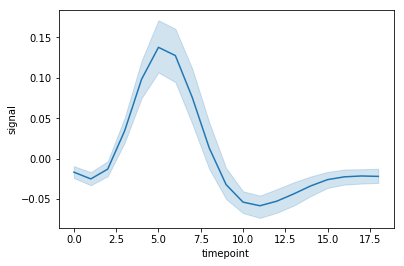

In [4]:
# line graph of fmri signal over time
sns.lineplot(x="timepoint", y="signal", data=fmri)

Can you guess why this plot returns both a line and a shaded area?

If we look back at our data preview, we can see that the `fmri` dataset contains data for several subjects, regions and events - meaning each `timepoint` has not just one, but multiple corresponding `signal` values. When this happens, `seaborn` knows to take the **mean** of the data (shown as the single line), but also report the **spread** of the data (here, the *confidence interval*, shown in the shaded band) to give us a sense of how similar/different the signal is across our subjects/regions/events.

But what if we wanted to visualize the *difference* between the signal in the frontal region vs. parietal region? `seaborn` lets us do this really simply with the `hue` parameter:

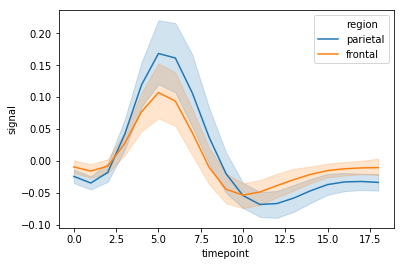

In [5]:
# separate plot by event column
sns.lineplot(x="timepoint", y="signal", hue="region", data=fmri)

Based on this plot what can we infer about the two regions in this fMRI scan? By separating the signal in the two regions we can easily see that the spike in signal is not as strong in the frontal region (orange) as it is in the parietal region (blue). 

What if we now wanted to separate the plot by the `event` column to see the differences between the *cue* and *stim* conditions? We could change the value of the `hue` parameter, or we could use another parameter - `style`.

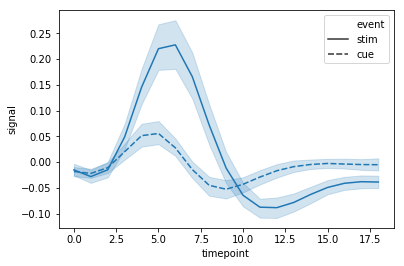

In [6]:
# separate and style plot by event column
sns.lineplot(x="timepoint", y="signal", style="event", data=fmri)

As you can see the `style` parameter separates our plot using different line styles, rather than different color lines. Based on this plot we can see the signal has a much higher spike in the *stim* condition than in the *cue* condition.

Finally, we can combine the `hue` and `style` parameters to separate our plot even more granularly.

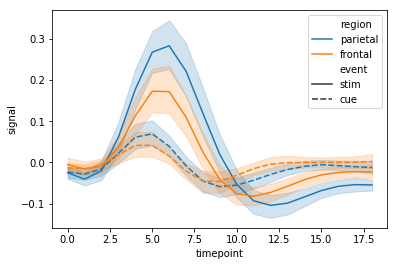

In [7]:
# separate and style plot by event column
sns.lineplot(x="timepoint", y="signal", hue="region", style="event", data=fmri)

What can you infer based on this plot?

In this lesson you learned:
* Plotting line graphs the `seaborn` package
* Separating the graph by another variable using colors (`hue`)
* Separating the graph by another variable using line type (`style`)
* Separating the graph by multiple variables (combine `hue` and `style`)